In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 77.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This

In [ ]:
import pycaret

In [ ]:
pycaret.__version__

'3.3.2'

In [ ]:
!kaggle datasets download -d waqi786/china-vs-japan
!unzip china-vs-japan.zip

Dataset URL: https://www.kaggle.com/datasets/waqi786/china-vs-japan
License(s): apache-2.0
  0% 0.00/74.8k [00:00<?, ?B/s]
100% 74.8k/74.8k [00:00<00:00, 57.8MB/s]
Archive:  china-vs-japan.zip
  inflating: Big_Japan_vs_China_Technology.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('Big_Japan_vs_China_Technology.csv')

In [ ]:
print(df.columns)

Index(['Country', 'Year', 'Tech Sector', 'Market Share (%)',
       'R&D Investment (in USD)', 'Number of Patents Filed (Annual)',
       'Number of Tech Companies', 'Tech Exports (in USD)',
       'Number of Startups', 'Venture Capital Funding (in USD)',
       'Global Innovation Ranking', 'Internet Penetration (%)',
       '5G Network Coverage (%)', 'University Research Collaborations',
       'Top Tech Products Exported', 'Number of Tech Workers'],
      dtype='object')


In [ ]:
from pycaret.classification import *
s = setup(df, target='Country', session_id=124)

,Description,Value
0,Session id,124
1,Target,Country
2,Target type,Binary
3,Target mapping,"China: 0, Japan: 1"
4,Original data shape,"(1000, 16)"
5,Transformed data shape,"(1000, 26)"
6,Transformed train set shape,"(700, 26)"
7,Transformed test set shape,"(300, 26)"
8,Numeric features,13
9,Categorical features,2


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5429,0.5712,0.5429,0.5435,0.5420,0.0862,0.0865,0.5130
xgboost,Extreme Gradient Boosting,0.5400,0.5675,0.5400,0.5405,0.5383,0.0797,0.0802,0.2190
dt,Decision Tree Classifier,0.5171,0.5170,0.5171,0.5179,0.5152,0.0341,0.0349,0.1570
gbc,Gradient Boosting Classifier,0.5157,0.5299,0.5157,0.5159,0.5141,0.0309,0.0313,0.5650
rf,Random Forest Classifier,0.5114,0.5219,0.5114,0.5119,0.5095,0.0234,0.0235,0.3380
nb,Naive Bayes,0.5071,0.5056,0.5071,0.5072,0.5020,0.0138,0.0140,0.1240
ridge,Ridge Classifier,0.5043,0.5032,0.5043,0.5041,0.5024,0.0087,0.0084,0.0780
svm,SVM - Linear Kernel,0.5029,0.5022,0.5029,0.3799,0.3792,0.0087,0.0100,0.1510
lda,Linear Discriminant Analysis,0.5029,0.5029,0.5029,0.5026,0.5011,0.0059,0.0055,0.1450
dummy,Dummy Classifier,0.5029,0.5000,0.5029,0.2529,0.3365,0.0000,0.0000,0.0770


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

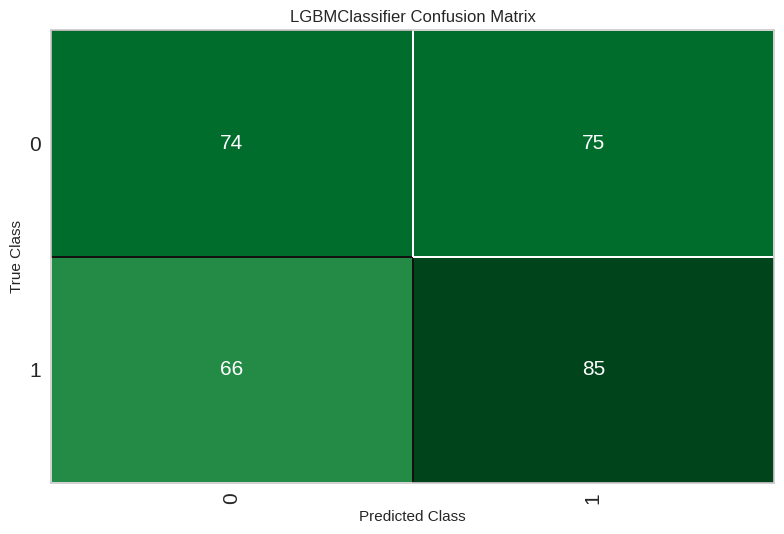

In [ ]:
plot_model(best, plot='confusion_matrix')

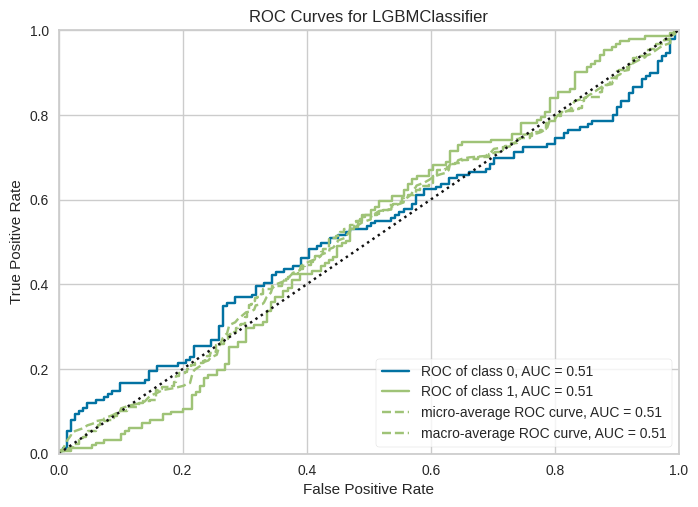

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

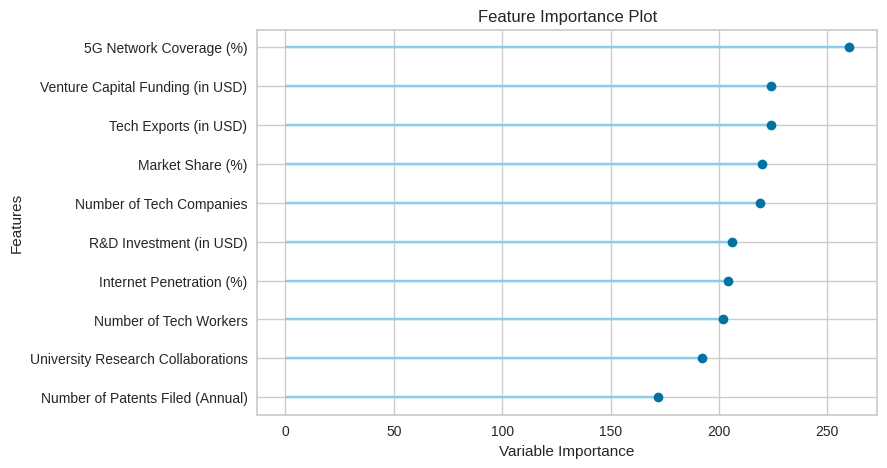

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5300,0.5116,0.5300,0.5299,0.5295,0.0596,0.0597


In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5300,0.5116,0.5300,0.5299,0.5295,0.0596,0.0597


In [ ]:
# copy data and drop Class variable

new_data = df.copy()
new_data.drop('Country', axis=1, inplace=True)
new_data.head()

,Year,Tech Sector,Market Share (%),R&D Investment (in USD),Number of Patents Filed (Annual),Number of Tech Companies,Tech Exports (in USD),Number of Startups,Venture Capital Funding (in USD),Global Innovation Ranking,Internet Penetration (%),5G Network Coverage (%),University Research Collaborations,Top Tech Products Exported,Number of Tech Workers
0,2001,Software,22.279014,8.377208e+10,1415,878,3.503155e+10,166,4.502694e+10,11,57.088673,82.240272,50,Robots,621221
1,2011,Semiconductor,31.899013,3.551134e+10,7899,364,3.714209e+10,217,1.147381e+10,14,78.172090,48.552982,134,5G Equipment,431928
2,2009,Robotics,33.574466,8.480948e+10,3749,425,1.570406e+11,451,5.498885e+09,14,55.810668,66.495286,58,Semiconductors,55776
3,2019,Cloud Computing,24.904248,2.267821e+10,3841,62,1.031284e+11,264,2.186278e+10,10,78.553714,28.807251,150,Robots,267852
4,2002,Robotics,46.975827,3.453655e+10,1704,458,1.112056e+11,463,4.098282e+10,10,70.427548,38.746268,74,AI Chips,654162


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Year,Tech Sector,Market Share (%),R&D Investment (in USD),Number of Patents Filed (Annual),Number of Tech Companies,Tech Exports (in USD),Number of Startups,Venture Capital Funding (in USD),Global Innovation Ranking,Internet Penetration (%),5G Network Coverage (%),University Research Collaborations,Top Tech Products Exported,Number of Tech Workers,prediction_label,prediction_score
0,2001,Software,22.279015,8.377208e+10,1415,878,3.503155e+10,166,4.502694e+10,11,57.088673,82.240273,50,Robots,621221,China,0.5419
1,2011,Semiconductor,31.899012,3.551134e+10,7899,364,3.714209e+10,217,1.147381e+10,14,78.172089,48.552982,134,5G Equipment,431928,China,0.6233
2,2009,Robotics,33.574467,8.480948e+10,3749,425,1.570406e+11,451,5.498885e+09,14,55.810669,66.495285,58,Semiconductors,55776,Japan,0.9071
3,2019,Cloud Computing,24.904249,2.267821e+10,3841,62,1.031284e+11,264,2.186278e+10,10,78.553711,28.807251,150,Robots,267852,Japan,0.9758
4,2002,Robotics,46.975826,3.453655e+10,1704,458,1.112056e+11,463,4.098282e+10,10,70.427551,38.746269,74,AI Chips,654162,China,0.9523


In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Year', 'Market Share (%)',
                                              'R&D Investment (in USD)',
                                              'Number of Patents Filed (Annual)',
                                              'Number of Tech Companies',
                                              'Tech Exports (in USD)',
                                              'Number of Startups...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                 

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Year', 'Market Share (%)',
                                             'R&D Investment (in USD)',
                                             'Number of Patents Filed (Annual)',
                                             'Number of Tech Companies',
                                             'Tech Exports (in USD)',
                                             'Numbe...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=124,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)